<a href="https://colab.research.google.com/github/byeol0211/2024-1-my-BDA/blob/main/Training/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 전처리

In [1]:
# 그래프 해상도 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '100'})

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
# 그림 해상도와 크기: 해상도를 높이면 크기에 비례에 커짐
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.dpi' : '100'})             # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [6,4]})      # 그림 크기, 기본값 [6, 4]

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np

In [5]:
df = sns.load_dataset('titanic')

In [6]:
print(df.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [9]:
# 결측치 확인
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

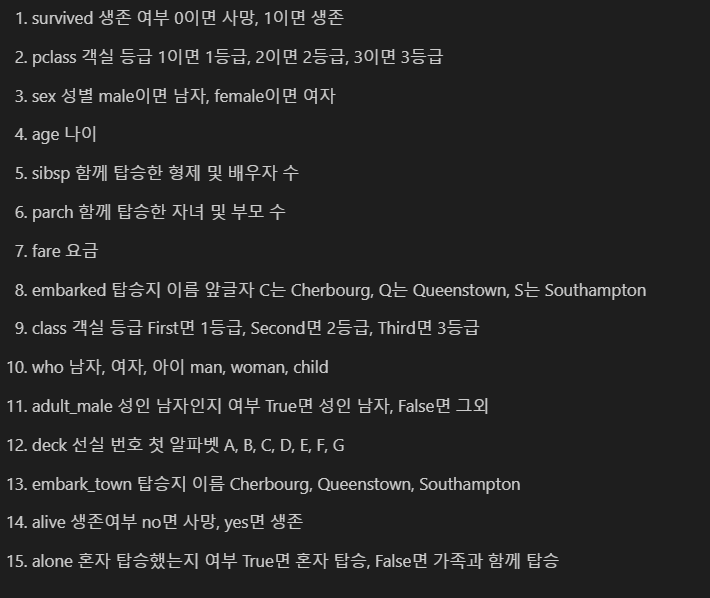

In [10]:
# 결측치가 많은 deck 제거
df=df.drop("deck", axis=1)

## 타이타닉 호의 탑승자 나이 분포

<Axes: xlabel='age', ylabel='Count'>

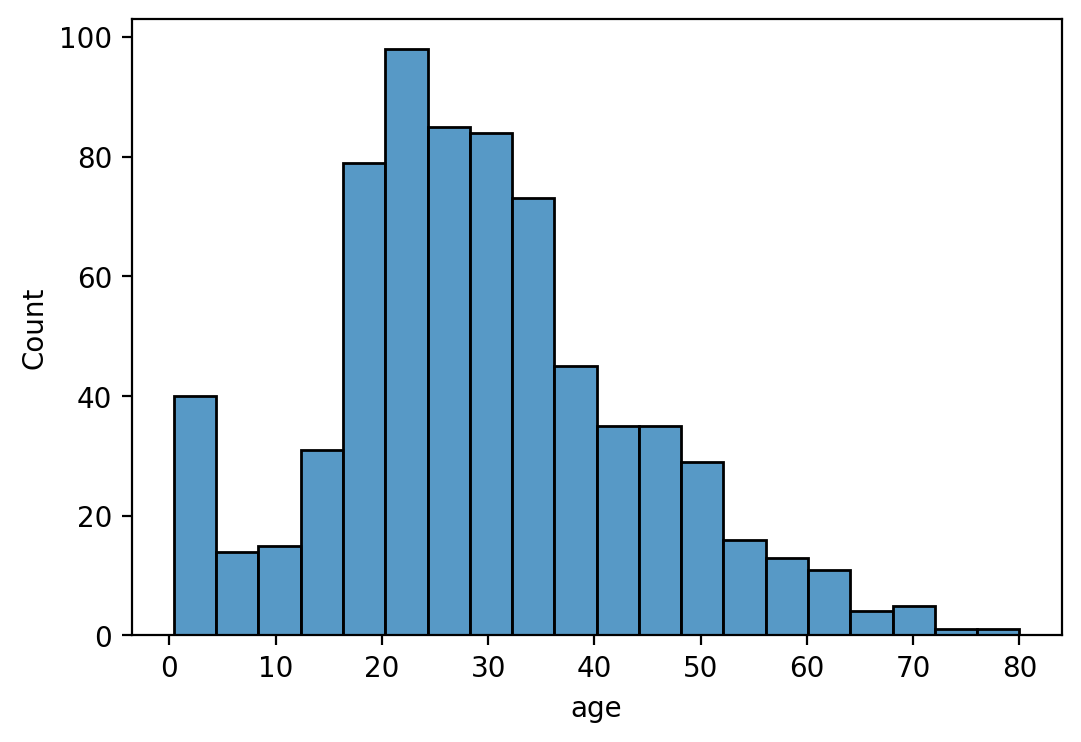

In [11]:
sns.histplot(data=df, x='age', bins=20)

## 사망자와 생존자별 나이 분포

<Axes: xlabel='age', ylabel='Count'>

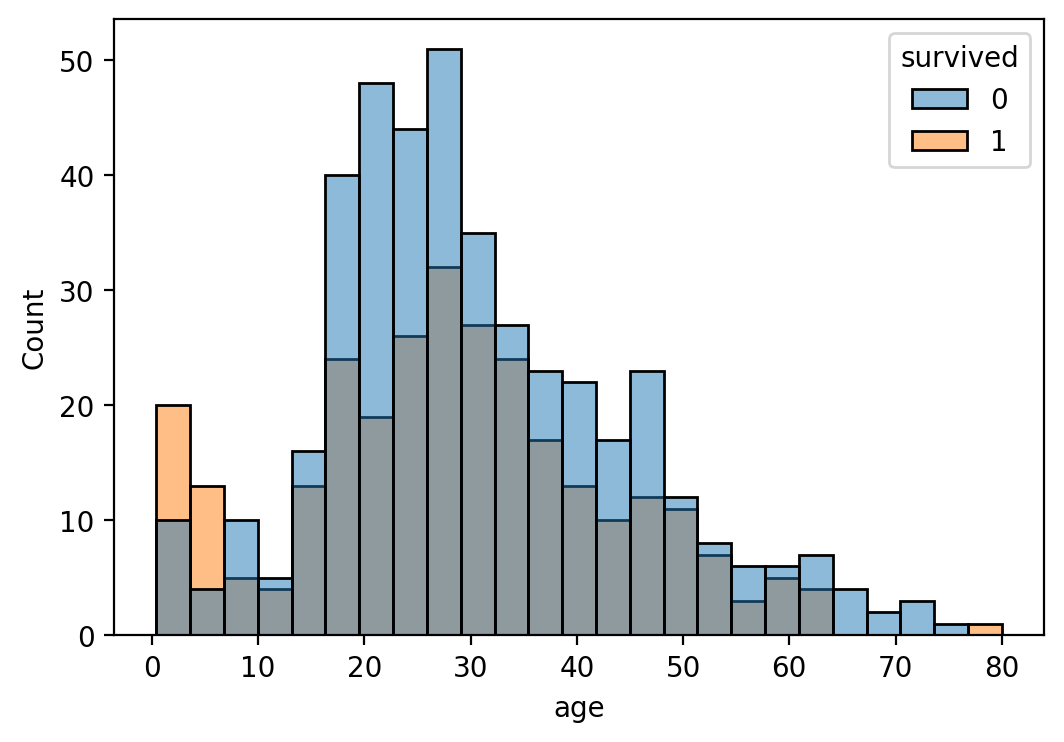

In [12]:
sns.histplot(data=df, x='age', bins=25, hue='survived')

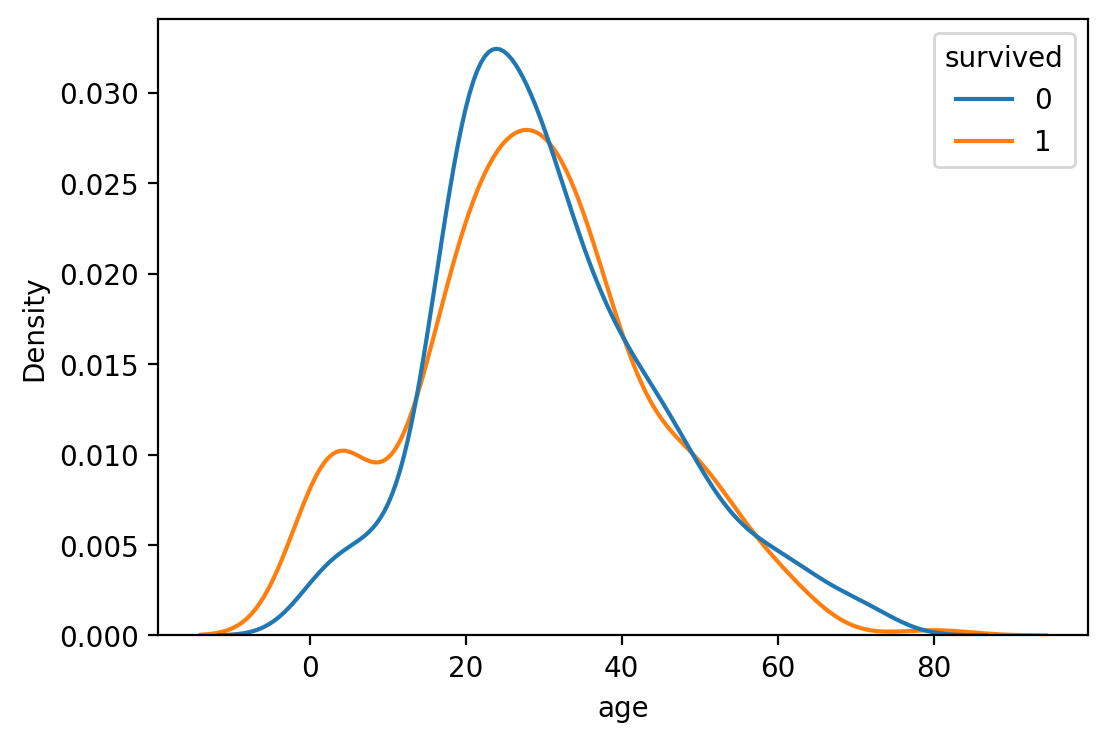

In [13]:
sns.kdeplot(df, x = 'age', hue='survived', common_norm=False)
plt.show()

# common_norm=False 를 함으로써 각 그룹의 분포를 독립적으로 비교가능

<ipython-input-14-780602abc962>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s['age'], bins=25, hist=False)
<ipython-input-14-780602abc962>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['age'], bins=25, hist=False)


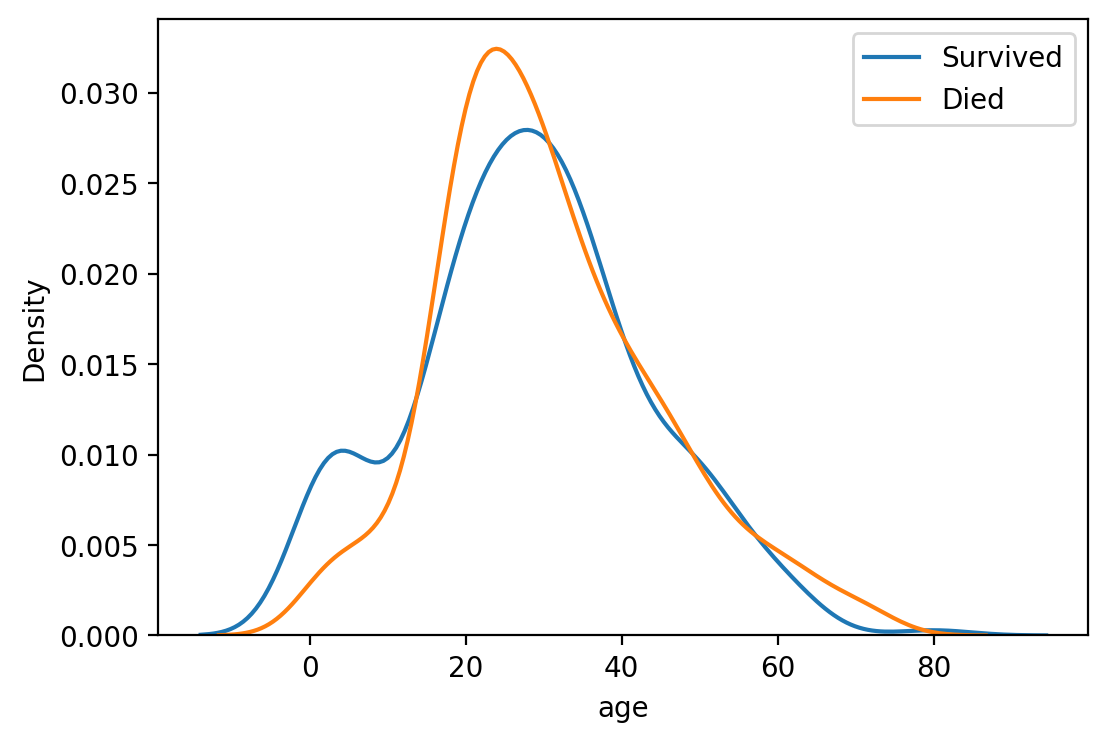

In [14]:
# 방법2

s = df[df['survived'] == 1]
d = df[df['survived'] == 0]

sns.distplot(s['age'], bins=25, hist=False)
sns.distplot(d['age'], bins=25, hist=False)

plt.legend(['Survived', 'Died'])
plt.show()

## 객실등급,성별 간의 사망률

In [15]:
# 객실등급별 사망자 수
df.query('survived == 0')['pclass'].value_counts()

pclass
3    372
2     97
1     80
Name: count, dtype: int64

In [16]:
# 성별 사망자 수
df.query('survived == 0')['sex'].value_counts()

sex
male      468
female     81
Name: count, dtype: int64

In [17]:
# 성별 생존률
df.groupby('sex').agg(arrived_mean=('survived', 'mean'))

,arrived_mean
sex,
female,0.742038
male,0.188908


<ipython-input-18-4067ddee2c5d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='pclass', y='survived',palette='coolwarm')


<Axes: xlabel='pclass', ylabel='survived'>

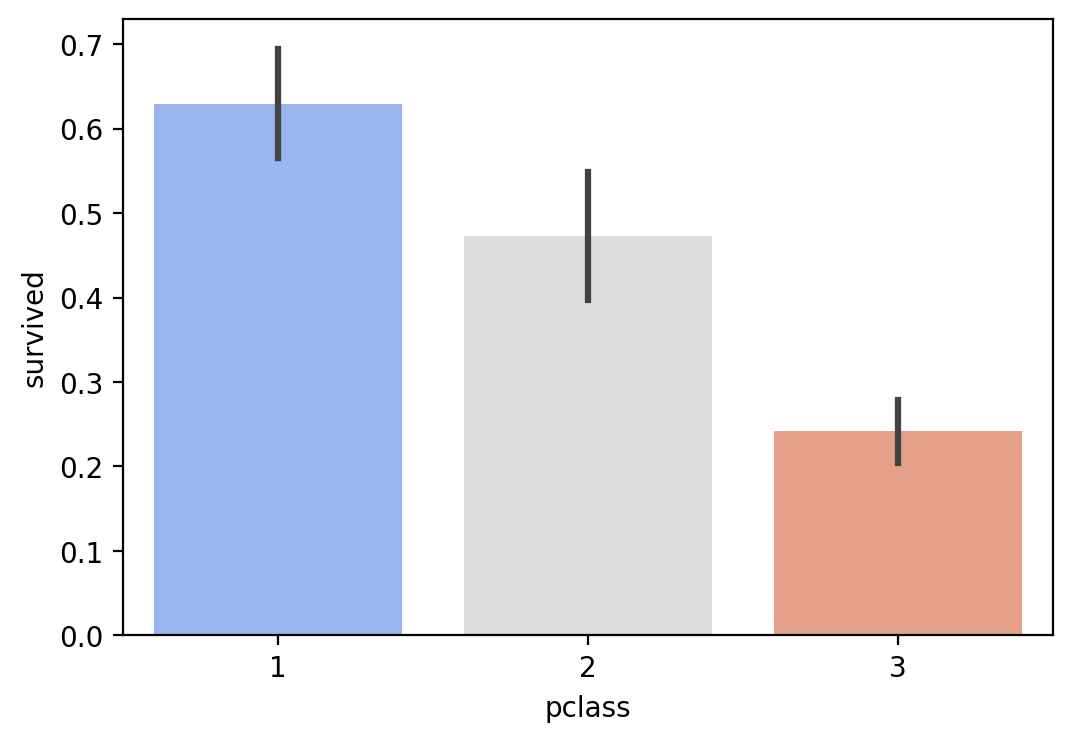

In [18]:
# 객실등급별 사망률
sns.barplot(data=df, x='pclass', y='survived',palette='coolwarm')

<Axes: xlabel='pclass', ylabel='survived'>

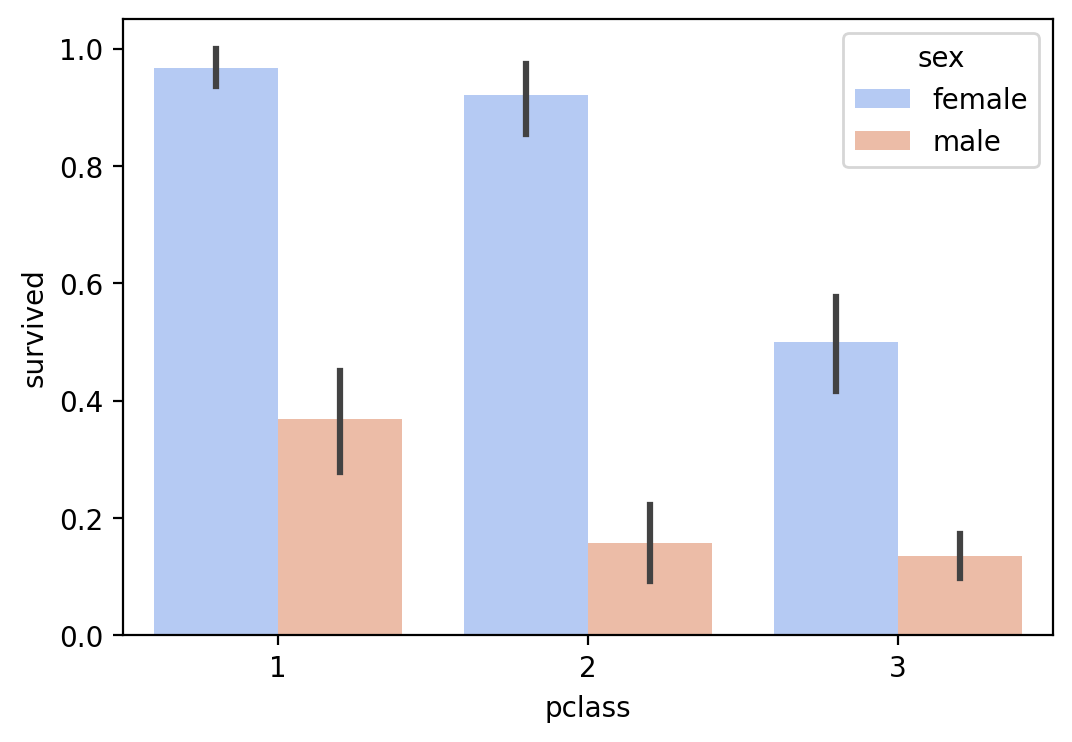

In [19]:
# 객실등급, 성별 사망률
sns.barplot(data=df, x='pclass', y='survived', hue='sex',palette='coolwarm')

## alone/ 탑승자수별 사망률 비교

In [20]:
df.groupby('alone').agg(arrived_mean=('survived', 'mean'))

,arrived_mean
alone,
False,0.505650
True,0.303538


<ipython-input-21-c566b4a40f14>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='alone', y='survived',palette='coolwarm').set(ylim=[0,1])


[(0.0, 1.0)]

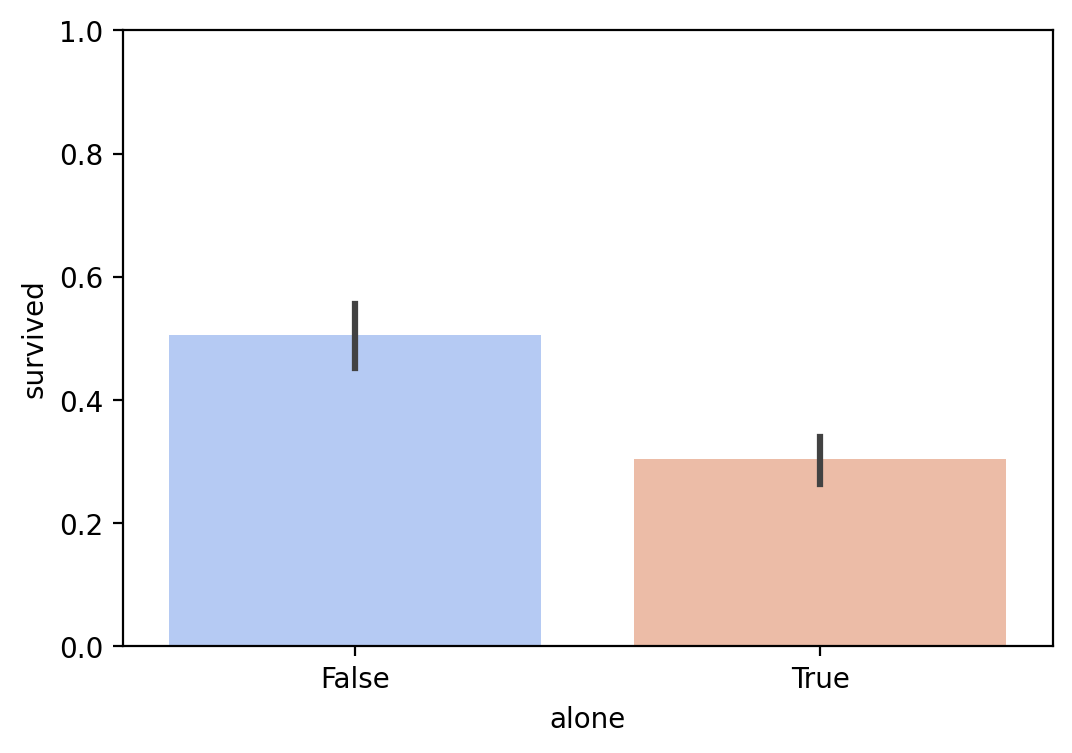

In [21]:
# alone별 사망률
sns.barplot(data=df, x='alone', y='survived',palette='coolwarm').set(ylim=[0,1])

In [22]:
# alone, 객실등급별 사망률
df.groupby(['pclass','alone']).agg(arrived_mean=('survived', 'mean'))

arrived_mean
pclass alone              
1      False      0.728972
       True       0.532110
2      False      0.637500
       True       0.346154
3      False      0.299401
       True       0.212963

[(0.0, 1.0)]

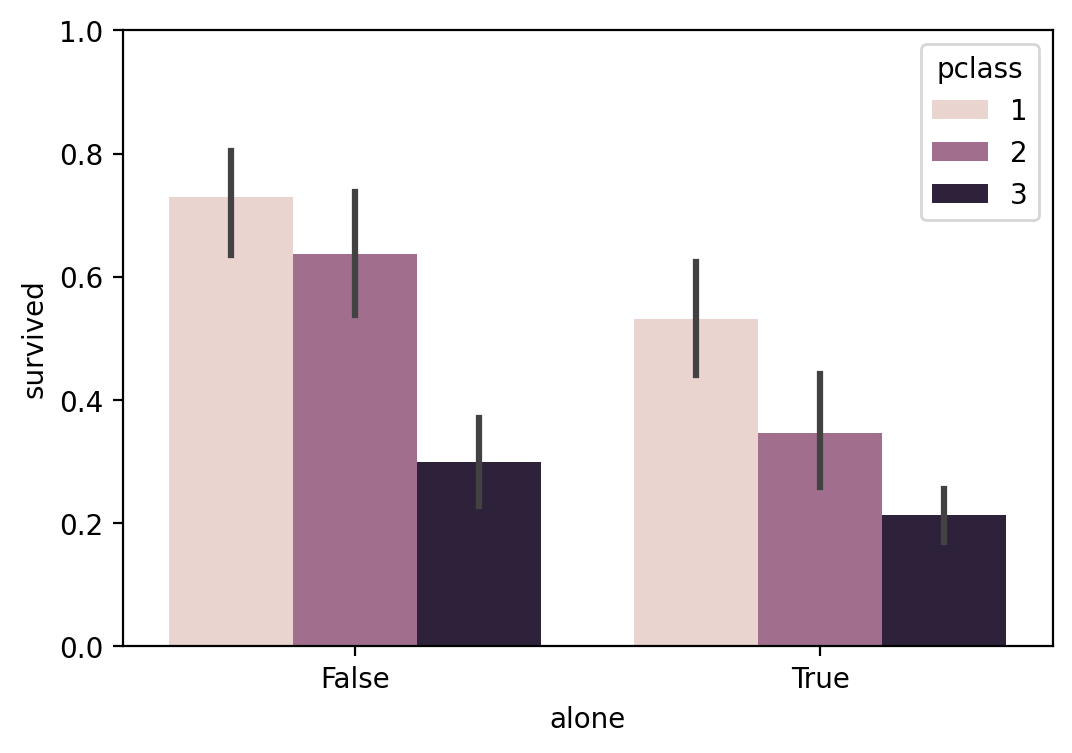

In [23]:
# alone, 객실등급별 사망률
sns.barplot(data=df, x='alone', y='survived', hue='pclass').set(ylim=[0,1])

[(0.0, 1.0)]

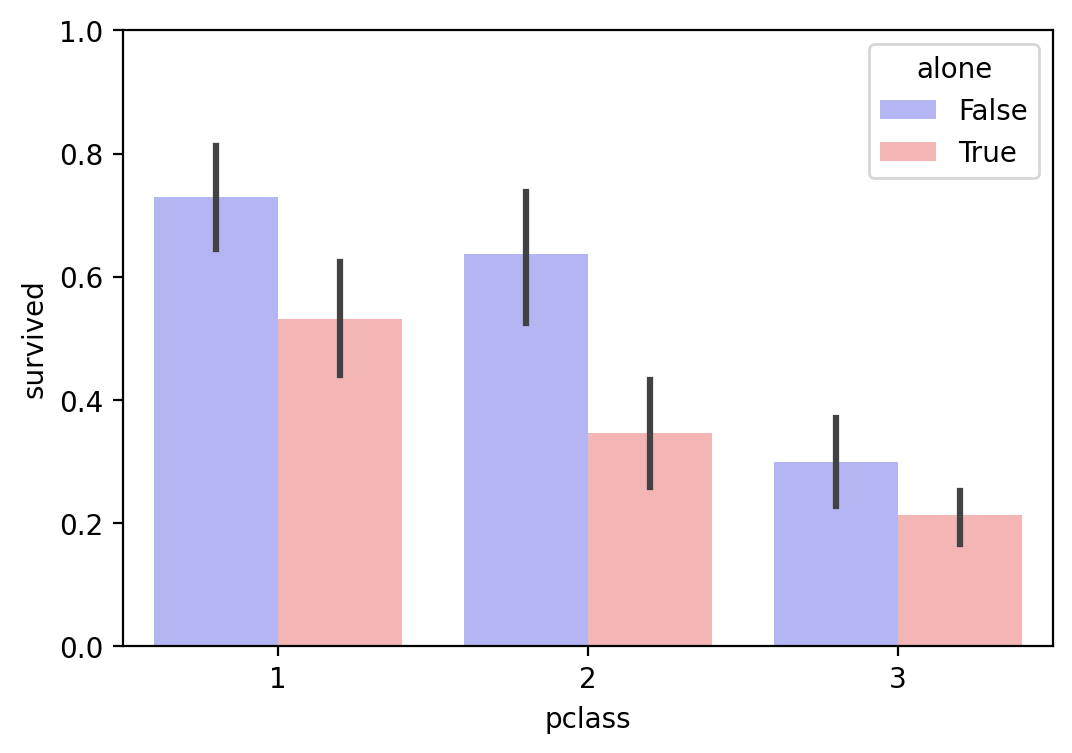

In [24]:
# alone, 객실등급별 사망률
sns.barplot(data=df, x='pclass', y='survived', hue='alone',palette='bwr').set(ylim=[0,1])

In [25]:
# sibsp 별 사망률

df[['sibsp', 'survived']].groupby(['sibsp']).mean()
#SibSp - 함께 탑승한 형제자매, 배우자 수 총합

,survived
sibsp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [26]:
#parch 별 사망률

df[['parch', 'survived']].groupby(['parch']).mean()
#Parch - 함께 탑승한 부모, 자녀 수 총합

,survived
parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [27]:
# sibsp + parch + 1 를 한 전체 인원수를 구한 p_total과 생존률

df.assign(p_total=(df['sibsp'] + df['parch'] + 1)).groupby('p_total').agg(arrived_mean=('survived', 'mean'))

,arrived_mean
p_total,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [28]:
# p_total 열 추가

df['p_total']=df['sibsp'] + df['parch'] + 1
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,p_total
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,1


In [49]:
# pclass별 p_total 수

df['p_total'].groupby(df['pclass']).value_counts()

pclass  p_total
1       1          109
        2           70
        3           24
        4            7
        6            4
        5            2
2       1          104
        2           34
        3           31
        4           13
        6            1
        5            1
3       1          324
        2           57
        3           47
        6           17
        7           12
        5           12
        4            9
        11           7
        8            6
Name: count, dtype: int64

<ipython-input-29-66bc21572c7a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='p_total', y='survived',palette='coolwarm')


<Axes: xlabel='p_total', ylabel='survived'>

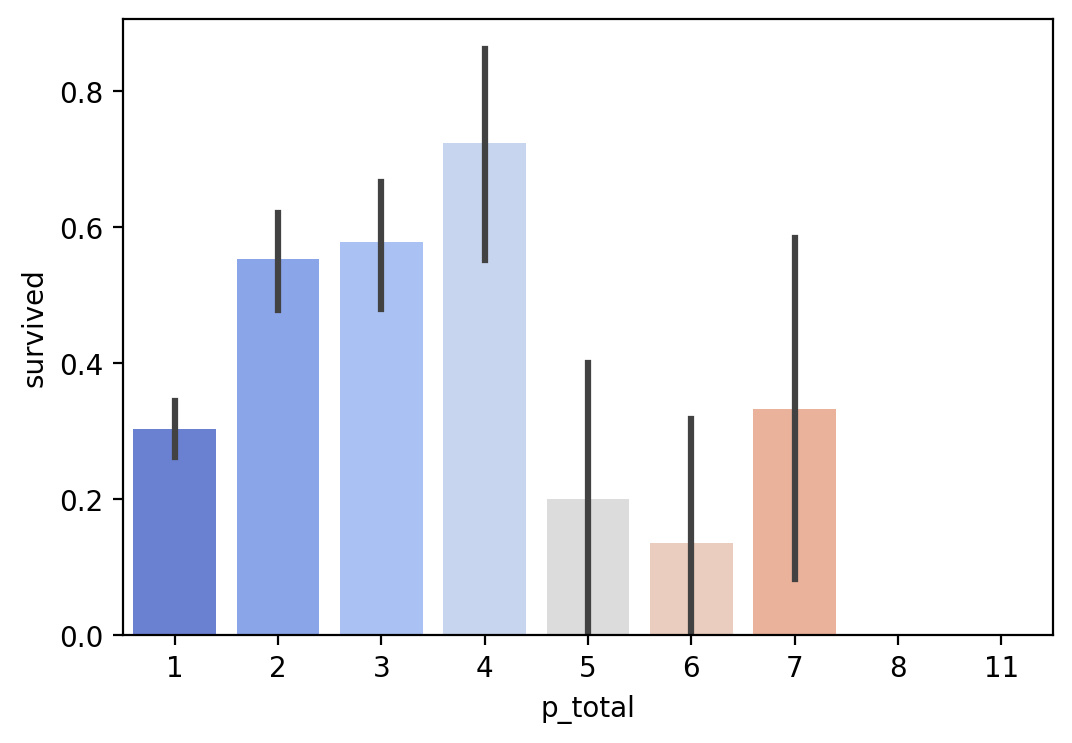

In [29]:
#p_total 당 생존률

sns.barplot(data=df, x='p_total', y='survived',palette='coolwarm')

In [30]:
#p_total과 객실등급별 생존률

df.groupby(['pclass','p_total']).agg(arrived_mean=('survived', 'mean'))

arrived_mean
pclass p_total              
1      1            0.532110
       2            0.728571
       3            0.750000
       4            0.714286
       5            1.000000
       6            0.500000
2      1            0.346154
       2            0.529412
       3            0.677419
       4            0.769231
       5            1.000000
       6            1.000000
3      1            0.212963
       2            0.350877
       3            0.425532
       4            0.666667
       5            0.000000
       6            0.000000
       7            0.333333
       8            0.000000
       11           0.000000

<Axes: xlabel='p_total', ylabel='survived'>

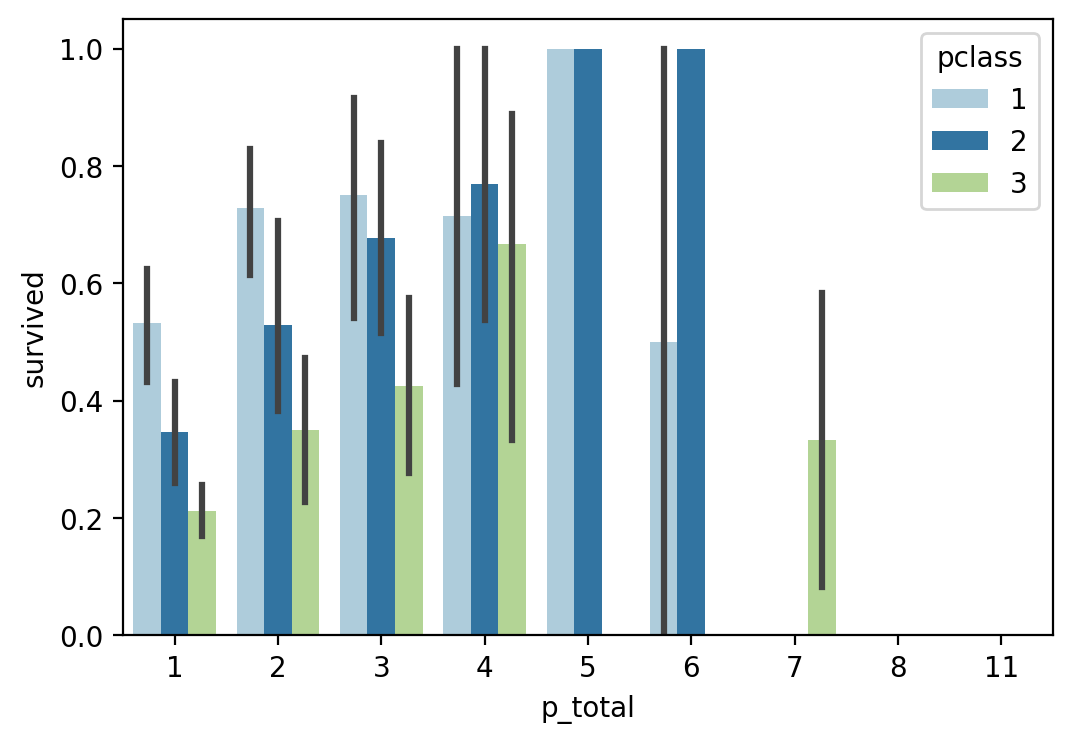

In [31]:
#p_total과 객실등급별 생존률
sns.barplot(data=df, x='p_total', y='survived', hue='pclass',palette='Paired')

<ipython-input-32-562c7a1710f5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x='p_total', y='survived', palette='Paired')


<Axes: xlabel='p_total', ylabel='survived'>

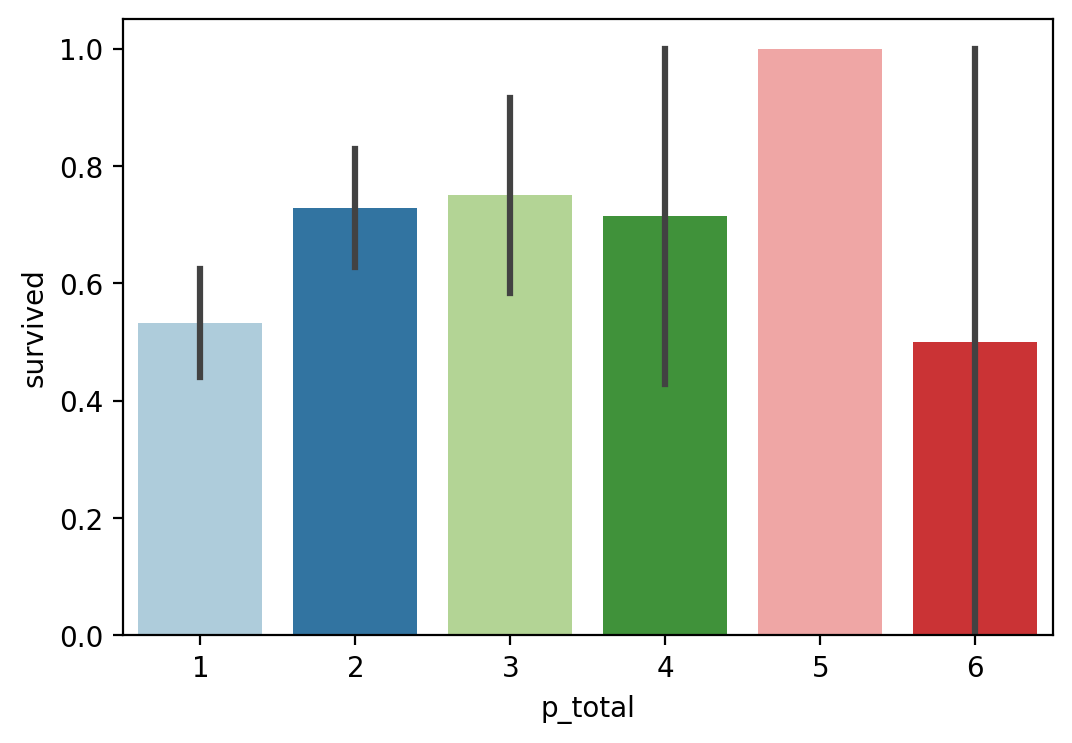

In [32]:
# first객실등급의 p_total당 생존률

df1 = df[df['pclass'] == 1]
df2 = df[df['pclass'] == 2]
df3 = df[df['pclass'] == 3]

sns.barplot(data=df1, x='p_total', y='survived', palette='Paired')

<ipython-input-33-2bd5f02fb419>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, x='p_total', y='survived',palette='coolwarm')


<Axes: xlabel='p_total', ylabel='survived'>

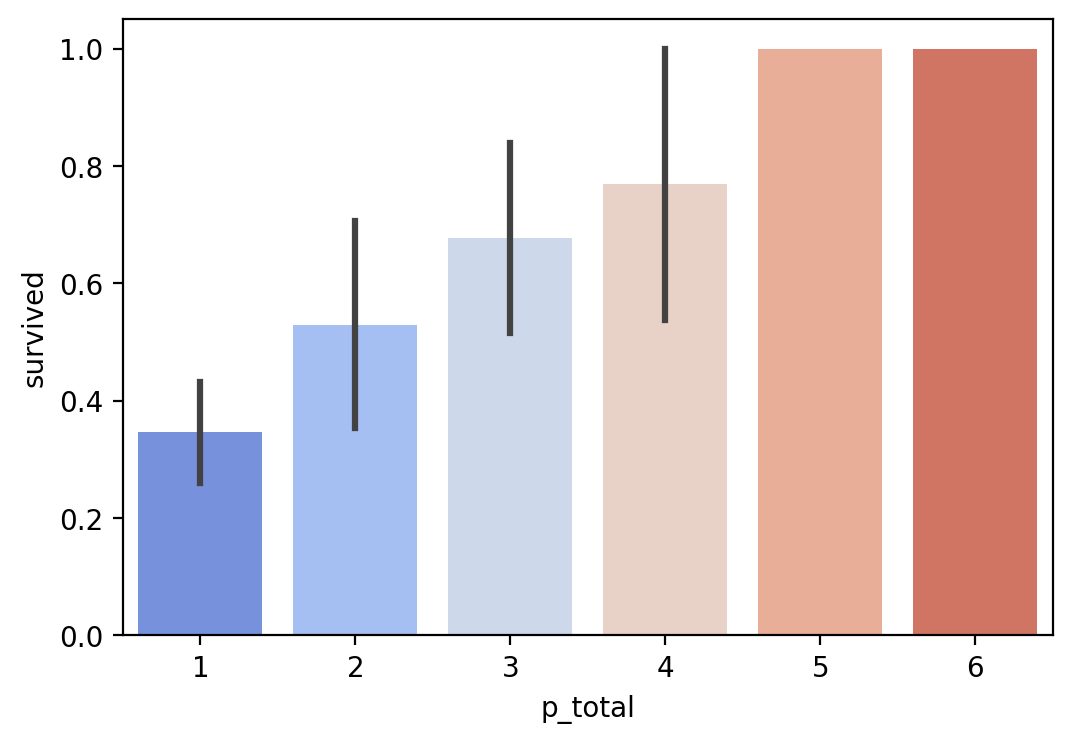

In [33]:
# second 객실등급의 p_total당 생존률
sns.barplot(data=df2, x='p_total', y='survived',palette='coolwarm')

<ipython-input-34-81c3f5908dcc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df3, x='p_total', y='survived', palette='coolwarm')


<Axes: xlabel='p_total', ylabel='survived'>

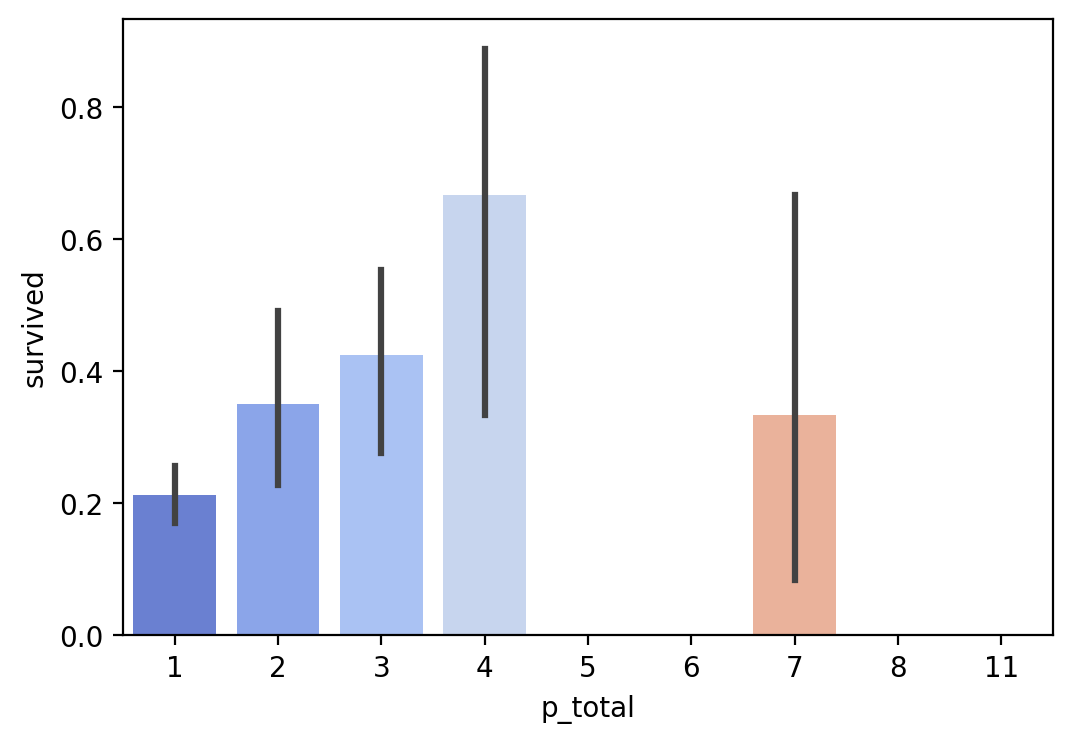

In [34]:
# third 객실등급의 p_total당 생존률

sns.barplot(data=df3, x='p_total', y='survived', palette='coolwarm')

## 요금과 생존률 상관관계

In [50]:
#요금 요약통계

df['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [51]:
#객실등급별 요금통계

df.groupby('pclass')['fare'].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


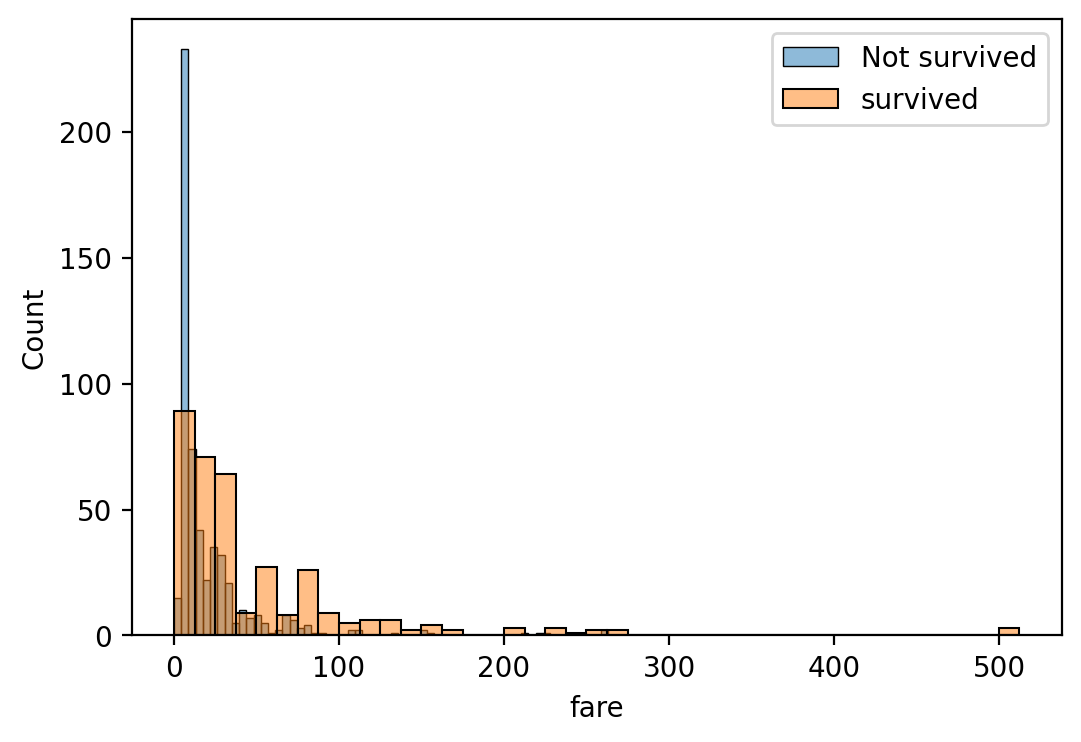

In [37]:
#요금별 생존률

sns.histplot(df[df.survived == 0]["fare"], label="Not survived", alpha = 0.5)
sns.histplot(df[df.survived == 1]["fare"], label="survived", alpha = 0.5)
plt.legend()

In [38]:
#생존여부에 따른 객실 등급별 평균

df.groupby(['survived','pclass']).agg(fare_mean=('fare', 'mean'))

fare_mean
survived pclass           
0        1       64.684007
         2       19.412328
         3       13.669364
1        1       95.608029
         2       22.055700
         3       13.694887

<Axes: xlabel='survived', ylabel='fare'>

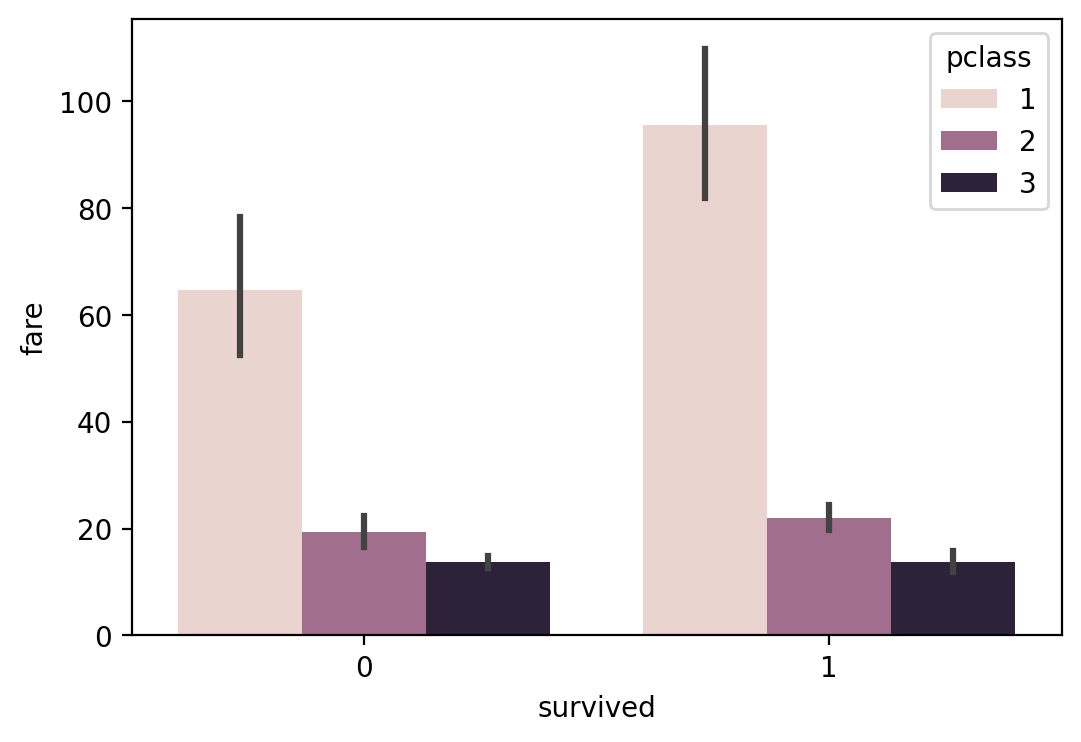

In [39]:
#생존여부에 따른 객실 등급별 평균

sns.barplot(data=df, x='survived', y='fare', hue='pclass')

<Axes: xlabel='pclass', ylabel='fare'>

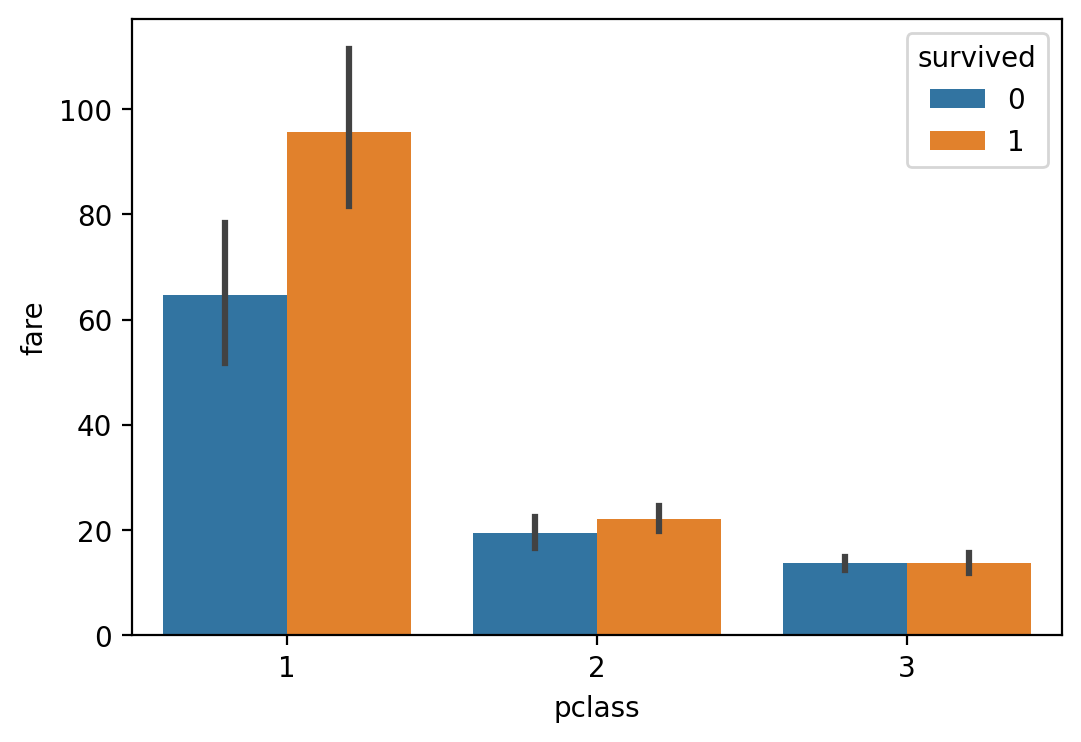

In [40]:
#생존여부에 따른 객실 등급별 평균

sns.barplot(data=df, x='pclass', y='fare', hue='survived')

## 탑승지역과의 상관관계

타이타닉 호는 Southampton-> Cherbourg -> Queenstown 순으로 기항 이후 침몰

In [41]:
# 탑승지역별 생존률

df.groupby('embarked').agg(arrived_mean=('survived', 'mean'))

,arrived_mean
embarked,
C,0.553571
Q,0.389610
S,0.336957


In [42]:
# 탑승지역및 등급별 평균 가족단위

df.groupby(['embarked','pclass']).agg(pto_mean=('p_total', 'mean'))

pto_mean
embarked pclass          
C        1       1.694118
         2       2.117647
         3       1.727273
Q        1       2.500000
         2       1.000000
         3       1.597222
S        1       1.826772
         2       1.762195
         3       2.144476

<Axes: xlabel='embarked', ylabel='count'>

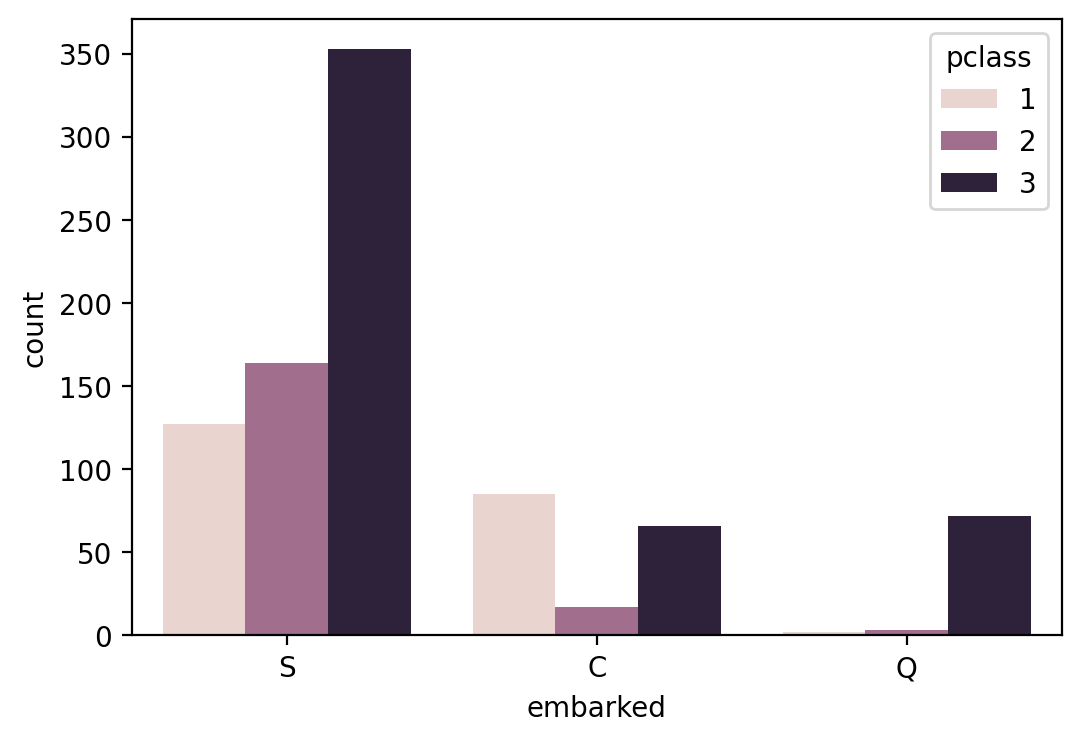

In [43]:
# 탑승지역별 객실등급 인원수

sns.countplot(data=df, x='embarked', hue='pclass')

<Axes: xlabel='embarked', ylabel='p_total'>

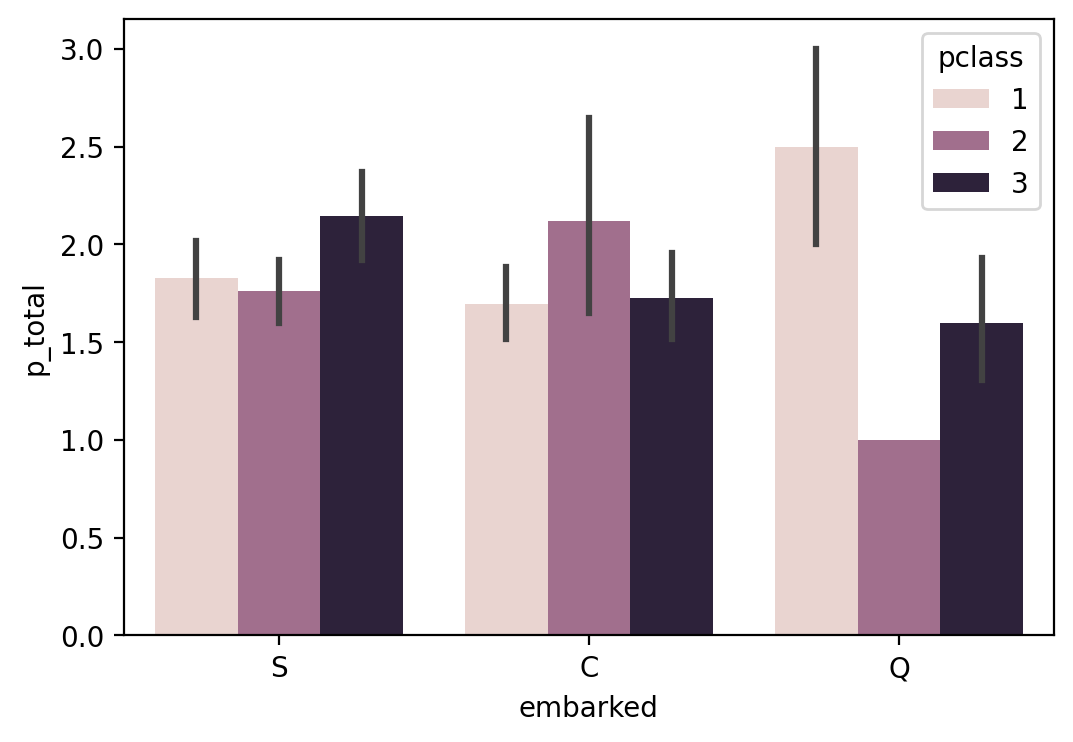

In [44]:
# 탑승지역및 객실등급별 평균 가족 단위원수

sns.barplot(data=df, x='embarked', y='p_total', hue='pclass')

<Axes: xlabel='pclass', ylabel='p_total'>

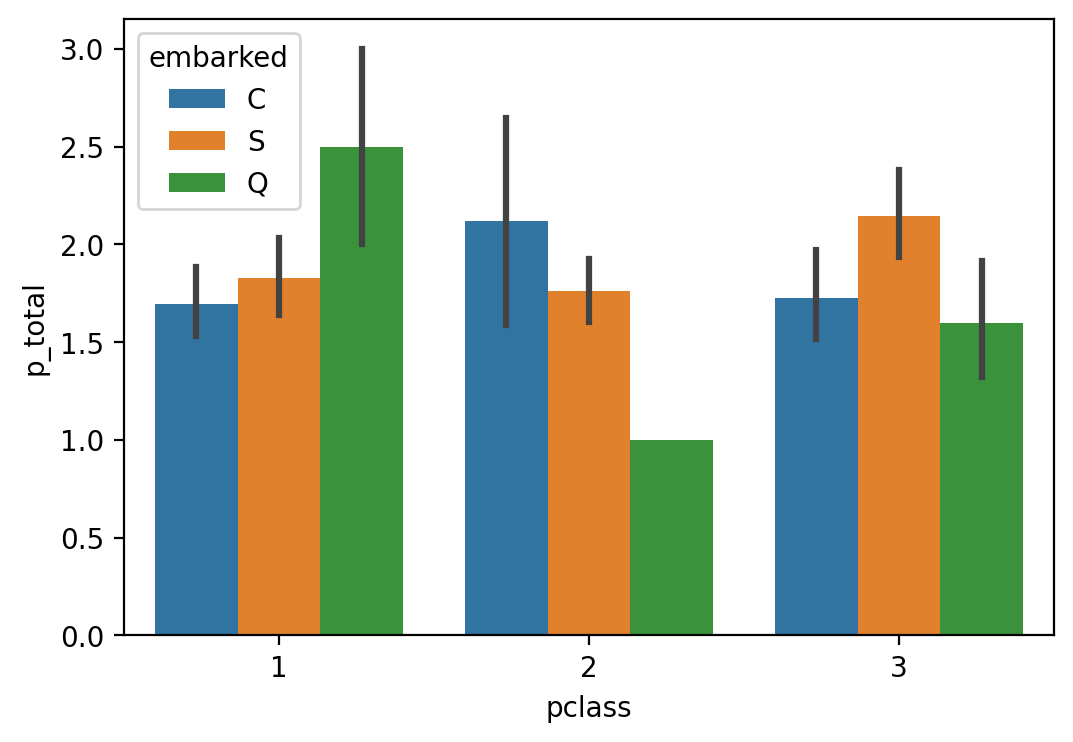

In [45]:
# 탑승지역및 객실등급별 평균 가족 단위원수

sns.barplot(data=df, x='pclass', y='p_total', hue='embarked')

In [46]:
# 탑승지역 및 객실등급별 평균생존률

df.groupby(['embarked','pclass']).agg(arrived_mean=('survived', 'mean'))

arrived_mean
embarked pclass              
C        1           0.694118
         2           0.529412
         3           0.378788
Q        1           0.500000
         2           0.666667
         3           0.375000
S        1           0.582677
         2           0.463415
         3           0.189802

<Axes: xlabel='embarked', ylabel='survived'>

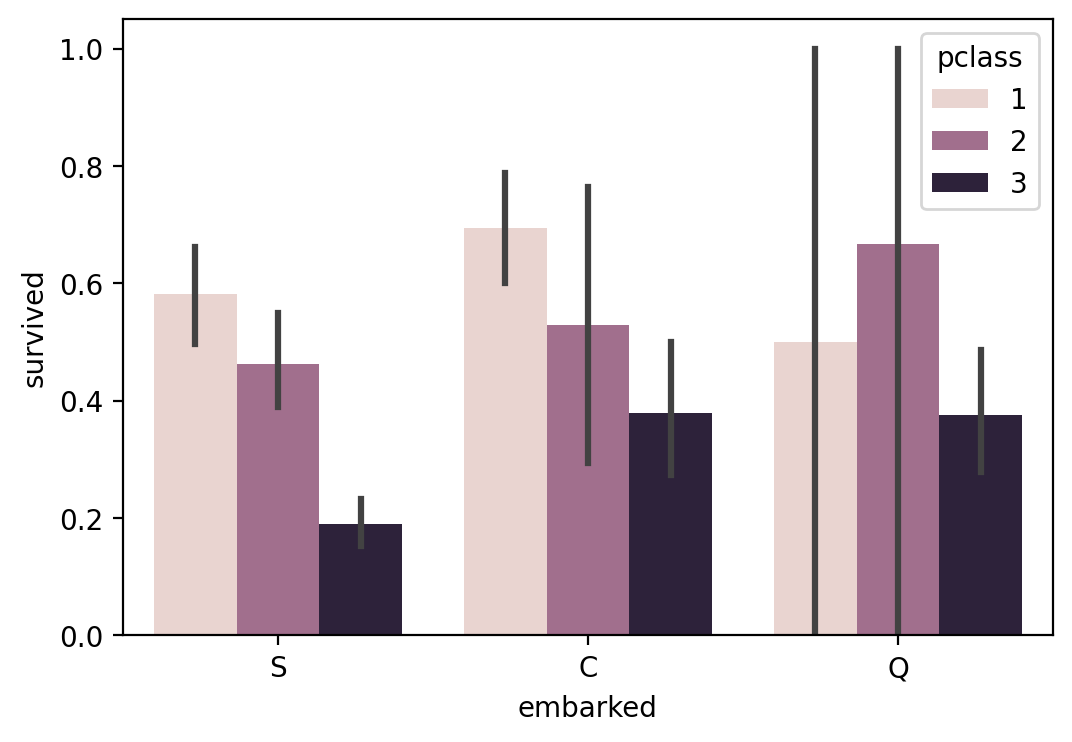

In [47]:
# 탑승지역 및 객실등급별 평균생존률

sns.barplot(data=df, x='embarked', y='survived', hue='pclass')

<Axes: xlabel='pclass', ylabel='survived'>

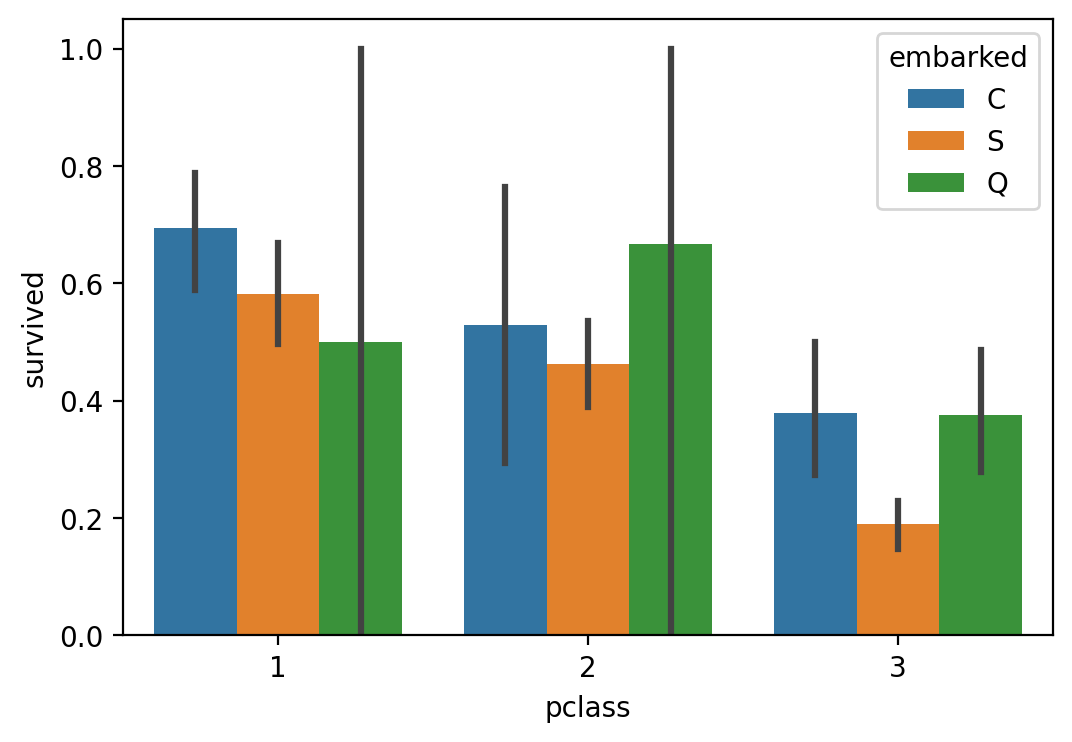

In [52]:
# 탑승지역 및 객실등급별 평균생존률

sns.barplot(data=df, x='pclass', y='survived', hue='embarked')